# Document d'analyse des vitesses

## Pour une oscillation sinusoidale simple.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

deg = np.pi/180
rad = 180/np.pi
mm = 1/1000

In [2]:
angle_meca_rad = 90 * deg  # angle de balayage mécanique complet
angle_sect_rad = 60 * deg  # angle du secteur utile
nb_lignes = 100            # nombre de lignes de tir
profondeur_m = 200 * mm    # profondeur maximum de retour des echos
vitesse_us_eau_m_s = 1500  # vitesse des US dans l'eau
angle_mort_rad = np.arcsin(angle_sect_rad/angle_meca_rad)  
duree_echo_s = profondeur_m * 2 / vitesse_us_eau_m_s

display(f"duree maxi echo = {duree_echo_s:.3} s")

'duree maxi echo = 0.000267 s'

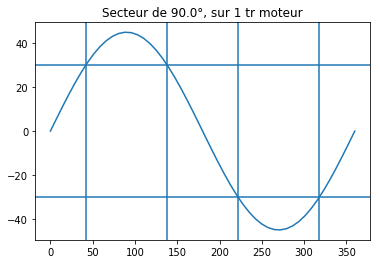

In [3]:
x = np.linspace(0, 360)
plt.plot(x, angle_meca_rad/2 * rad * np.sin(x * deg))
plt.axhline(angle_sect_rad/2 * rad)
plt.axhline(-angle_sect_rad/2 * rad)
plt.axvline(angle_mort_rad * rad)
plt.axvline(180 - angle_mort_rad * rad)
plt.axvline(180 + angle_mort_rad * rad)
plt.axvline(360 - angle_mort_rad * rad)

plt.title('Secteur de ' + str(angle_meca_rad * rad) + '°, sur 1 tr moteur');

In [4]:
pas_tir_rad = angle_sect_rad / nb_lignes
vitesse_tir_max_rad_s = pas_tir_rad / duree_echo_s

display(f"pas angulaire = {pas_tir_rad * rad :.4} °")
display(f"vitesse angulaire tirs max = {vitesse_tir_max_rad_s * rad :.10} °/s = {vitesse_tir_max_rad_s * rad / 360.0:.10} tr/s = {vitesse_tir_max_rad_s * rad / 360.0 * 60:.10} tr/mn")

'pas angulaire = 0.6 °'

'vitesse angulaire tirs max = 2250.0 °/s = 6.25 tr/s = 375.0 tr/mn'

Si la position angulaire en fonction du temps est :

angle_tir_rad = angle_meca_rad/2 * sin(vitesse_mot_rad_s * t)

En dérivant on obtient :

vitesse_tir_instant_rad_s = vitesse_mot_rad_s * angle_meca_rad/2 * cos(vitesse_mot_rad_s * t)

Et donc vitesse_tir_instant_max_rad_s = vitesse_mot_rad_s * angle_meca_rad/2 et ne doit pas dépasser vitesse_tir_max_rad_s

A la limite vitesse_tir_instant_max_rad_s = vitesse_tir_max_rad_s

Alors vitesse_mot_rad_s = vitesse_tir_max_rad_s / ( angle_meca_rad/2 )

In [5]:
vitesse_mot_max_rad_s = vitesse_tir_max_rad_s / ( angle_meca_rad/2 )

display(f"Vitesse moteur max = {vitesse_mot_max_rad_s * rad :.5} °/s = {vitesse_mot_max_rad_s * rad / 360.0:.3} tr/s = {vitesse_mot_max_rad_s * rad / 360.0 * 60:.4} tr/mn")

fps_max = vitesse_mot_max_rad_s * rad / 360.0 * 2

display(f"Balayages max = {fps_max :.3} fps")

'Vitesse moteur max = 2864.8 °/s = 7.96 tr/s = 477.5 tr/mn'

'Balayages max = 15.9 fps'

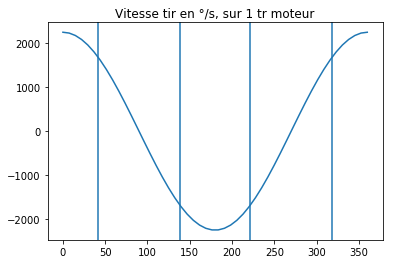

In [6]:
plt.plot(x, vitesse_mot_max_rad_s * angle_meca_rad/2 * np.cos(x * deg)*rad)
plt.axvline(angle_mort_rad * rad)
plt.axvline(180 - angle_mort_rad * rad)
plt.axvline(180 + angle_mort_rad * rad)
plt.axvline(360 - angle_mort_rad * rad)

plt.title('Vitesse tir en °/s, sur 1 tr moteur');